DS12 python で iris データを kmeans法でクラスタリング

In [1]:
# google colab で実行する場合は以下のコメントアウトを外す
#! wget https://github.com/KHiraGit/sudspg_ds/raw/main/iris.csv

In [1]:
# ライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.cluster import KMeans

<Figure size 1080x468 with 0 Axes>

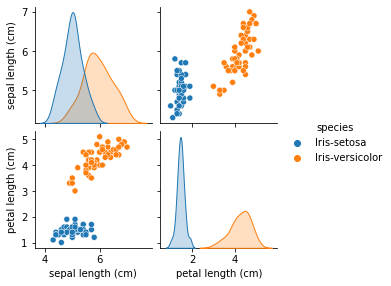

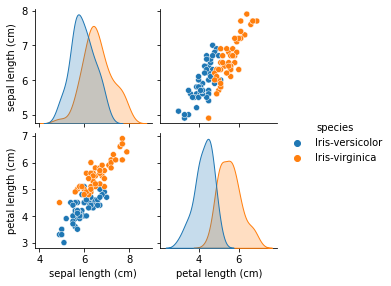

In [5]:
# irisデータ(csv形式)から読み込む
iris_df = pd.read_csv('iris.csv')
iris_df = iris_df[['sepal length (cm)', 'petal length (cm)', 'species']]

# setosa x versicolor のデータフレームを作成
iris_df_1 = iris_df[iris_df['species'] != 'Iris-virginica']
iris_data_1 = iris_df_1[['sepal length (cm)', 'petal length (cm)']]
iris_target_1 = iris_df_1['species']

# versicolor x virginica のデータフレームを作成
iris_df_2 = iris_df[iris_df['species'] != 'Iris-setosa']
iris_data_2 = iris_df_2[['sepal length (cm)', 'petal length (cm)']]
iris_target_2 = iris_df_2['species']

# ペアプロットを表示
plt.figure(figsize=(15, 6.5))
sns.pairplot(iris_df_1, hue='species', height=2)
sns.pairplot(iris_df_2, hue='species', height=2)

In [13]:
# kmeans法を実行
kmeans_1 = KMeans(n_clusters=2, max_iter=30, init="random")
cluster_1 = kmeans_1.fit(iris_data_1)
kmeans_2 = KMeans(n_clusters=2, max_iter=30, init="random")
cluster_2 = kmeans_2.fit(iris_data_2)

# 散布図表示のコードは notebook で配布

e:\sudspg\su_dspg_ds\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


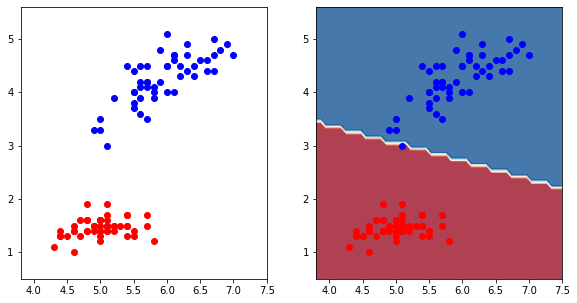

In [14]:
# 散布図表示のコード (1)
x = np.linspace(iris_data_1['sepal length (cm)'].min() - 0.5, iris_data_1['sepal length (cm)'].max() + 0.5)
y = np.linspace(iris_data_1['petal length (cm)'].min() - 0.5, iris_data_1['petal length (cm)'].max() + 0.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -cluster_1.predict(XX)
Z = Z.reshape(X.shape)

figure = plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 3, 1)
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-setosa']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-setosa']['petal length (cm)'], c='red')
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-versicolor']['petal length (cm)'], c='blue')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

ax = plt.subplot(1, 3, 2)
ax.contourf(X, Y, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-setosa']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-setosa']['petal length (cm)'], c='red')
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-versicolor']['petal length (cm)'], c='blue')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

plt.show()

e:\sudspg\su_dspg_ds\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


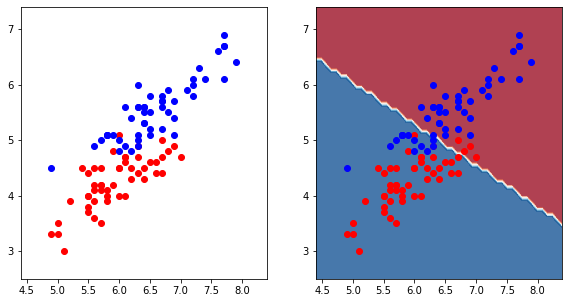

In [15]:
# 散布図表示のコード (2)
x = np.linspace(iris_data_2['sepal length (cm)'].min() - 0.5, iris_data_2['sepal length (cm)'].max() + 0.5)
y = np.linspace(iris_data_2['petal length (cm)'].min() - 0.5, iris_data_2['petal length (cm)'].max() + 0.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -cluster_2.predict(XX)
Z = Z.reshape(X.shape)

figure = plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 3, 1)
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-versicolor']['petal length (cm)'], c='red')
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-virginica']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-virginica']['petal length (cm)'], c='blue')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

ax = plt.subplot(1, 3, 2)
ax.contourf(X, Y, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-versicolor']['petal length (cm)'], c='red')
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-virginica']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-virginica']['petal length (cm)'], c='blue')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

plt.show()

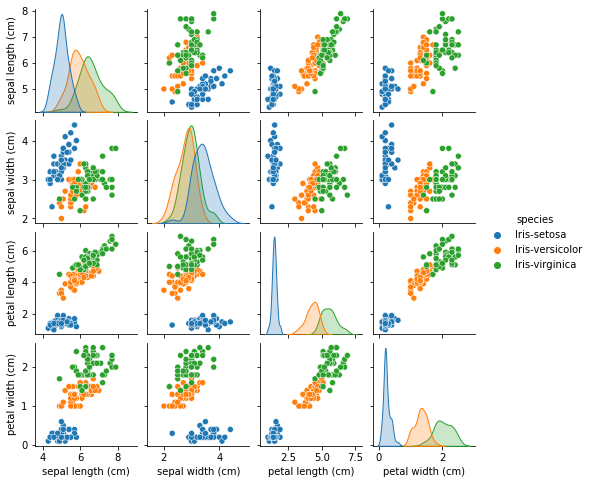

In [16]:
# irisデータ(csv形式)から読み込んでデータフレームを作成
iris_df = pd.read_csv('iris.csv')
# ペアプロットを表示
sns.pairplot(iris_df, hue='species', height=1.7)

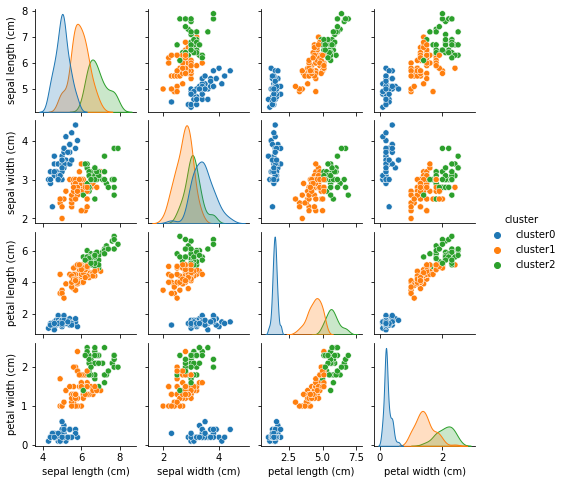

In [18]:
# クラスタリング用のデータとラベルを用意 
iris_data_df = iris_df[['sepal length (cm)', 'sepal width (cm)', 
                        'petal length (cm)', 'petal width (cm)']]
iris_target_df = iris_df[['species']]
# kmeans法を実行
kmeans = KMeans(n_clusters=3, max_iter=30, init="random")
cluster = kmeans.fit_predict(iris_data_df)
# 結果を確認
iris_result = iris_data_df.copy()
iris_result["cluster"] = ["cluster"+str(x) for x in cluster]
sns.pairplot(iris_result, hue='cluster', height=1.7)

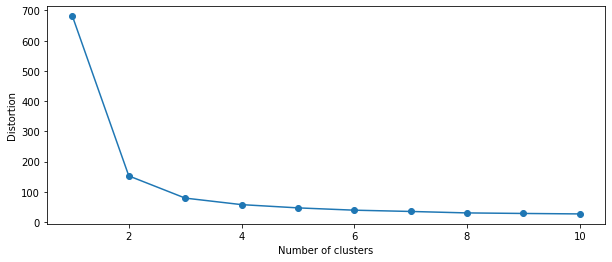

In [19]:
import matplotlib.pyplot as plt
distortions = []

for i  in range(1,11):
    km = KMeans(n_clusters=i, init='random', max_iter=30, random_state=0)
    km.fit(iris_data_df)
    distortions.append(km.inertia_)

plt.figure(figsize=(10,4))
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()